# Admission Leads Interest Analysis

## Objective
To analyze admission leads and classify them into High Interested and Low Interested leads
based on available contact information.

# Dataset Description
 The dataset contains admission leads.
    
# Available columns:
    
Name
    
Contact Number

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder



In [25]:
import sklearn
print(sklearn.__version__)


1.6.1


In [26]:
df = pd.read_excel("Excel1.xlsx")
df.head()


,Name,Contact Number
0,Pratiksha,p:+917887975613
1,Pratik Garudkar,p:9284539651
2,gitanjali bhokare_005,p:+917875825005
3,Vivek Patil,p:+917058531008
4,Krishna Pawar,p:+919529959173


In [35]:
df = df.rename(columns={
    df.columns[0]: 'Name',
    df.columns[1]: 'Contact'
})


In [36]:
# Clean contact
df['Contact'] = df['Contact'].fillna('').astype(str)

# Create interest label using logic
def classify_interest(contact):
    contact = contact.replace('+', '').replace('p:', '').strip()
    if contact.isdigit() and len(contact) == 10:
        return 'High'
    else:
        return 'Low'

df['Interest_Level'] = df['Contact'].apply(classify_interest)
print(df[['Name','Contact','Interest_Level']].head(10))



                    Name          Contact Interest_Level
0              Pratiksha  p:+917887975613            Low
1        Pratik Garudkar     p:9284539651           High
2  gitanjali bhokare_005  p:+917875825005            Low
3            Vivek Patil  p:+917058531008            Low
4          Krishna Pawar  p:+919529959173            Low
5     𝓼𝓲𝓭𝓱𝓮𝓼𝓱𝔀𝓪𝓻 𝓫𝓾𝓷𝓰942  p:+919371264518            Low
6   official_abhirokade_  p:+918329532807            Low
7           lRaju Bankar  p:+919404429913            Low
8           Gaurav Munde     p:9503744983           High
9        Shrikant Shinde  p:+917620390861            Low


In [38]:
le = LabelEncoder()
df['Interest_Label'] = le.fit_transform(df['Interest_Level'])
df[['Name','Contact','Interest_Level','Interest_Label']].head(10)



,Name,Contact,Interest_Level,Interest_Label
0,Pratiksha,p:+917887975613,Low,1
1,Pratik Garudkar,p:9284539651,High,0
2,gitanjali bhokare_005,p:+917875825005,Low,1
3,Vivek Patil,p:+917058531008,Low,1
4,Krishna Pawar,p:+919529959173,Low,1
5,𝓼𝓲𝓭𝓱𝓮𝓼𝓱𝔀𝓪𝓻 𝓫𝓾𝓷𝓰942,p:+919371264518,Low,1
6,official_abhirokade_,p:+918329532807,Low,1
7,lRaju Bankar,p:+919404429913,Low,1
8,Gaurav Munde,p:9503744983,High,0
9,Shrikant Shinde,p:+917620390861,Low,1


In [30]:
df['Contact_Length'] = df['Contact'].apply(len)


In [31]:
X = df[['Contact_Length']]
y = df['Interest_Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [33]:
df['Predicted_Interest'] = model.predict(X)
df['Predicted_Interest'] = df['Predicted_Interest'].map({1:'High', 0:'Low'})

df.head()


,Name,Contact,Interest_Level,Interest_Label,Contact_Length,Predicted_Interest
0,Pratiksha,p:+917887975613,Low,1,15,High
1,Pratik Garudkar,p:9284539651,High,0,12,High
2,gitanjali bhokare_005,p:+917875825005,Low,1,15,High
3,Vivek Patil,p:+917058531008,Low,1,15,High
4,Krishna Pawar,p:+919529959173,Low,1,15,High


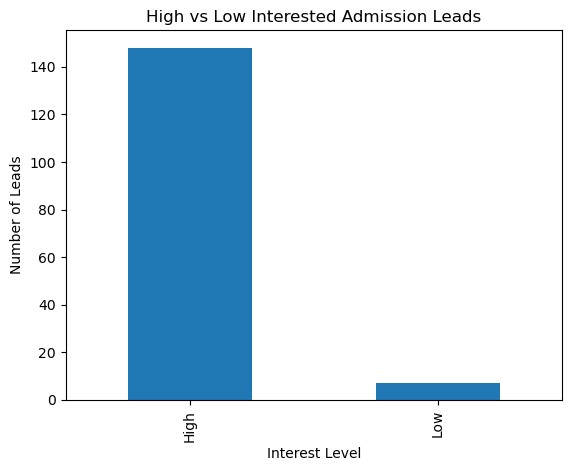

In [34]:
summary = df['Predicted_Interest'].value_counts()

plt.figure()
summary.plot(kind='bar')
plt.title('High vs Low Interested Admission Leads')
plt.xlabel('Interest Level')
plt.ylabel('Number of Leads')
plt.show()


# Assumptions
Leads with valid 10-digit contact numbers are considered High Interested.
Invalid, missing, or incorrect contact numbers are considered Low Interested.
Interest level is derived logically due to limited data availability.